<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/F9_Power_Tranformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Detailed Explanation of `PowerTransformer` in Scikit-learn

The `PowerTransformer` is a powerful preprocessing technique used to transform features to a more Gaussian (normal) distribution. Many statistical models and machine learning algorithms perform best or rely on the assumption that input variables have a Gaussian distribution. Transforming skewed data to be more Gaussian can lead to improved model performance, better convergence, and more robust statistical inferences.

### Core Idea: Power Transforms

The fundamental concept behind a power transform is to apply a mathematical function to your data that compresses or expands values in a way that reduces skewness. The two primary power transformation methods implemented in `PowerTransformer` are:

1.  **Yeo-Johnson Transformation**
    *   **Versatility:** This is the default and most flexible method. Unlike Box-Cox, the Yeo-Johnson transformation can be applied to data that contains **zero, positive, and negative values**. This makes it suitable for a wide range of datasets.
    *   **Formula:** The transformation is defined piecewise:
        *   For $y \ge 0$: $y^{(\lambda)} = \frac{(y+1)^\lambda - 1}{\lambda}$ if $\lambda \ne 0$, and $y^{(\lambda)} = \log(y+1)$ if $\lambda = 0$.
        *   For $y < 0$: $y^{(\lambda)} = \frac{-(|y|+1)^{2-\lambda} + 1}{2-\lambda}$ if $\lambda \ne 2$, and $y^{(\lambda)} = -\log(|y|+1)$ if $\lambda = 2$.
    *   **How $\lambda$ is found:** The optimal $\lambda$ (lambda) value for each feature is estimated using maximum likelihood estimation. This means the transformer finds the $\lambda$ that maximizes the log-likelihood function of the transformed data, assuming a Gaussian distribution.
    *   **Benefits:** It helps stabilize variance, makes the data more symmetric, and reduces the influence of extreme values.

2.  **Box-Cox Transformation**
    *   **Limitation:** This transformation can **only be applied to strictly positive data**. If your data contains zero or negative values, you cannot use the Box-Cox method directly without some prior manipulation (e.g., adding a constant to shift all values to positive).
    *   **Formula:** The transformation is defined as:
        *   $y^{(\lambda)} = \frac{y^\lambda - 1}{\lambda}$ if $\lambda \ne 0$
        *   $y^{(\lambda)} = \log(y)$ if $\lambda = 0$
    *   **How $\lambda$ is found:** Similar to Yeo-Johnson, the optimal $\lambda$ is estimated using maximum likelihood estimation.
    *   **Benefits:** Effective for transforming positively skewed data to a more normal distribution, especially common in fields like economics or biology where data often follows a power law.

### Key Parameters and Usage

When initializing `PowerTransformer`, you typically consider these parameters:

*   `method`: This is the most important parameter. You choose either `'yeo-johnson'` (default) or `'box-cox'`. Select based on whether your data can contain zero or negative values.

*   `standardize`: This is a boolean, defaulting to `True`. After applying the power transformation, if `standardize=True`, the transformed data is then **centered** (mean becomes 0) and **scaled** (variance becomes 1). This is often a good practice because many algorithms also benefit from standardized input data. If you prefer to handle standardization separately or your algorithm doesn't require it, you can set this to `False`.

### Workflow with `PowerTransformer`

1.  **Instantiation:** Create an instance of the `PowerTransformer` class, specifying the `method` if you don't want the default `yeo-johnson`.
    ```python
    from sklearn.preprocessing import PowerTransformer
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    ```

2.  **Fitting:** Call the `fit()` method on your training data. During this step, the transformer learns the optimal $\lambda$ value(s) for each feature based on the distribution of your training data.
    ```python
    pt.fit(X_train) # X_train should be a 2D array (samples, features)
    ```

3.  **Transformation:** Use the `transform()` method to apply the learned transformation to your data. It's crucial to apply the *same* fitted transformer to both your training and test datasets to ensure consistency.
    ```python
    X_train_transformed = pt.transform(X_train)
    X_test_transformed = pt.transform(X_test)
    ```
    You can also use `fit_transform()` as a shortcut for fitting and then transforming the training data.
    ```python
    X_train_transformed = pt.fit_transform(X_train)
    ```

### Why Use PowerTransformer?

*   **Improved Model Performance:** Many algorithms (e.g., linear regression, logistic regression, SVMs, neural networks) assume or perform better with normally distributed features. Transformations can help meet these assumptions.
*   **Reduced Skewness:** Highly skewed data can lead to models being overly influenced by outliers or exhibiting poor generalization. Power transforms can make the data more symmetric.
*   **Stabilized Variance:** In some cases, the variance of a variable might depend on its mean. Power transforms can help stabilize this relationship.
*   **Handling Outliers (indirectly):** While not directly an outlier detection method, by compressing the tails of a distribution, power transforms can reduce the disproportionate influence of extreme values.

In summary, `PowerTransformer` is a versatile tool in your preprocessing arsenal for making your data more amenable to machine learning models by pushing its distribution closer to Gaussian.

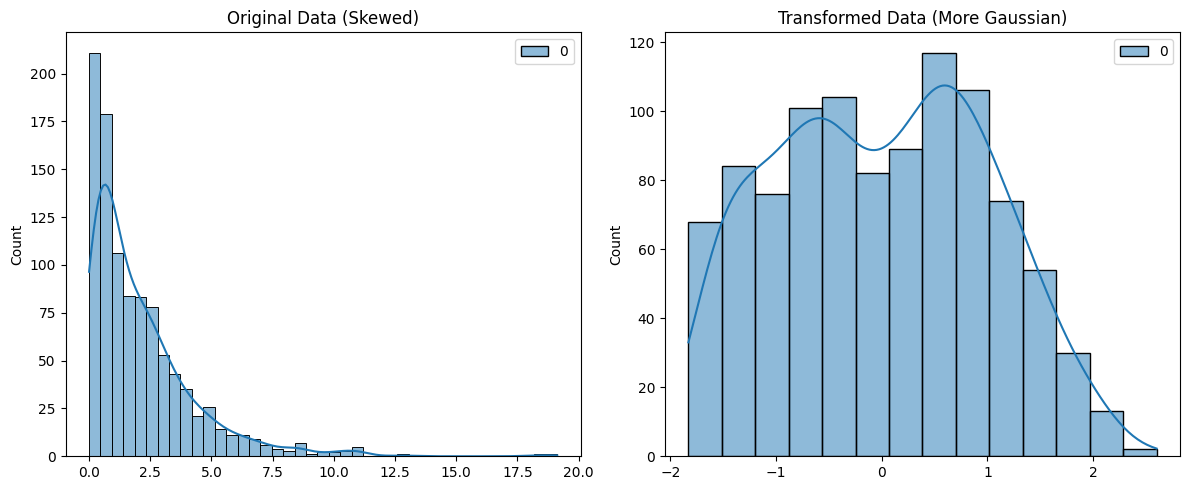

In [ ]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some skewed data
data = np.random.exponential(scale=2, size=1000).reshape(-1, 1)

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the data
data_transformed = pt.fit_transform(data)

# Plot original and transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data, kde=True, ax=axes[0])
axes[0].set_title('Original Data (Skewed)')

sns.histplot(data_transformed, kde=True, ax=axes[1])
axes[1].set_title('Transformed Data (More Gaussian)')

plt.tight_layout()
plt.show()

### How to Apply `PowerTransformer` to Your Own Dataset

Applying `PowerTransformer` to your dataset follows a standard scikit-learn preprocessing pattern. The key is to `fit` the transformer *only* on your training data to prevent data leakage, and then use the *fitted* transformer to `transform` both your training and testing (or new unseen) data.

Here are the general steps:

1.  **Load Your Data**: First, you need to load your dataset into a pandas DataFrame or a NumPy array.

2.  **Split Data (Training/Testing)**: If you're building a machine learning model, it's crucial to split your data into training and testing sets *before* applying any transformations. This ensures that the transformation parameters (like the optimal $\lambda$) are learned only from the training data.

3.  **Identify Features to Transform**: Determine which columns (features) in your dataset you want to apply the power transformation to. It's usually applied to numerical features that are skewed.

4.  **Instantiate `PowerTransformer`**: Create an instance of the `PowerTransformer`. You can specify the `method` (`'yeo-johnson'` or `'box-cox'`) and whether to `standardize` the output.

5.  **Fit on Training Data**: Call the `fit()` method of the `PowerTransformer` instance on your *training data*. This step calculates the optimal $\lambda$ value(s) for each feature based on the training data's distribution.

6.  **Transform Training and Test Data**: Use the `transform()` method of the *fitted* `PowerTransformer` to apply the learned transformation to both your training and testing data. You should *not* refit the transformer on the test data.

    *   For training data, you can use `fit_transform()` as a shortcut.
    *   For test data, always use `transform()`.

7.  **Integrate with Pipeline (Optional but Recommended)**: For more robust and reproducible workflows, integrate `PowerTransformer` into a scikit-learn `Pipeline`.

Below is a code example demonstrating these steps.

Original training data shape: (700, 3)
Original testing data shape: (300, 3)

Transformed training data shape: (700, 3)
Transformed testing data shape: (300, 3)

First 5 rows of original training data:


,feature_exp,feature_lognorm,feature_neg
541,1.863695,1.698410,4.899738
440,0.177308,0.304953,4.932048
482,1.212256,1.713873,4.305645
422,0.191274,1.130090,4.982292
778,2.546192,4.449041,3.954441



First 5 rows of transformed training data:


,feature_exp,feature_lognorm,feature_neg
541,0.342453,0.453096,1.191320
440,-1.421217,-1.338130,1.258500
482,-0.111020,0.463517,0.121424
422,-1.393793,-0.022010,1.364939
778,0.686401,1.439932,-0.377325


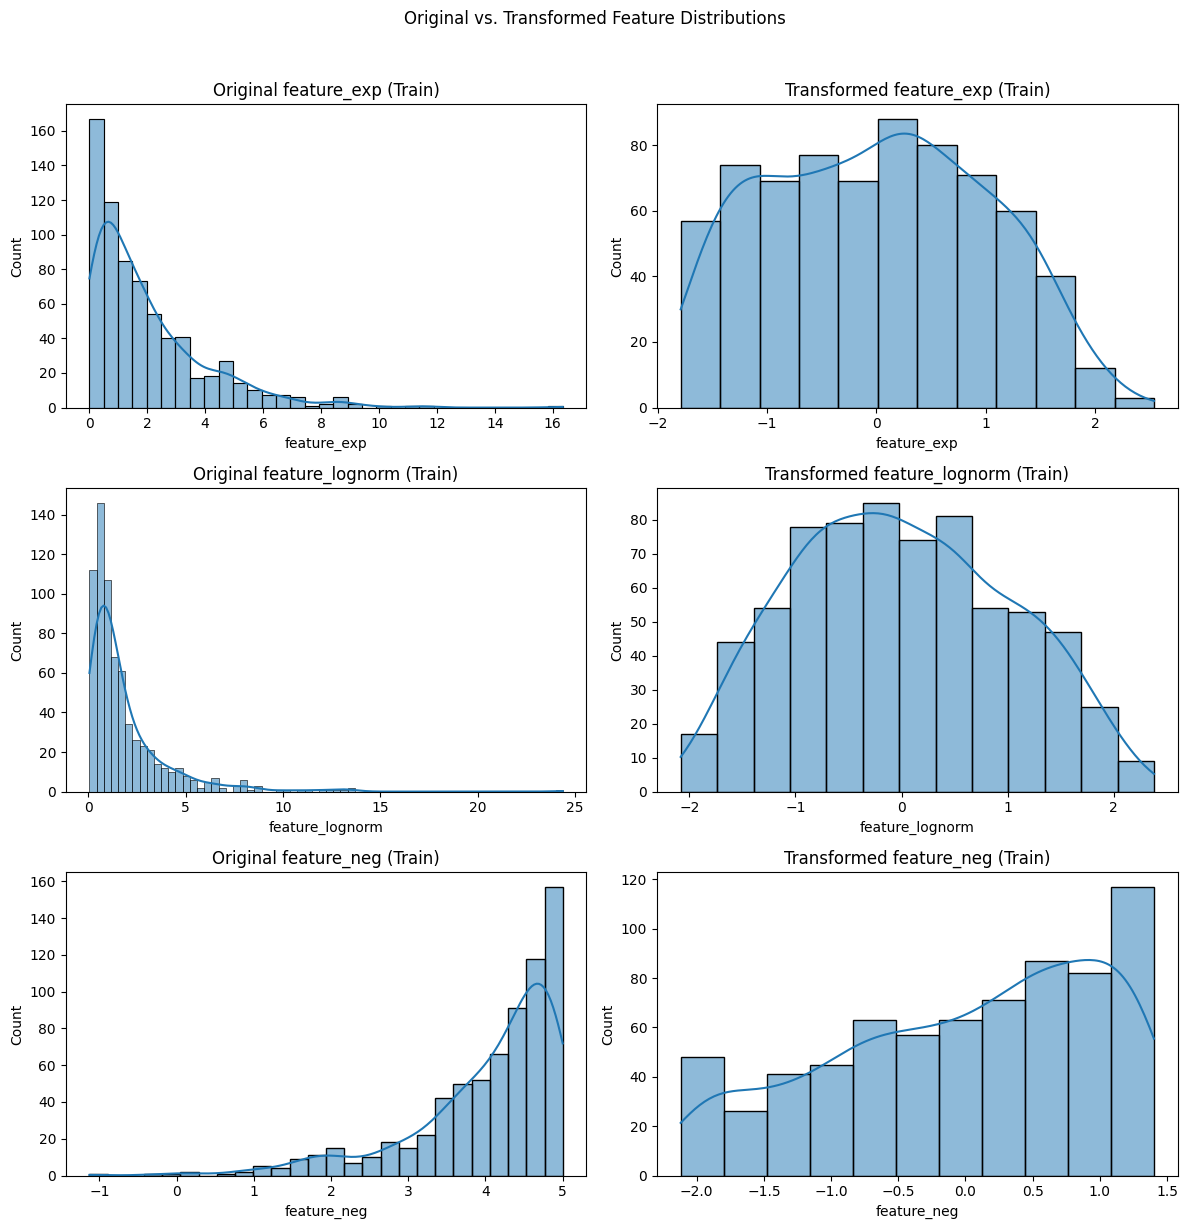

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate or load your own skewed data
# For demonstration, let's create a DataFrame with multiple skewed features
np.random.seed(42)
data_size = 1000

df = pd.DataFrame({
    'feature_exp': np.random.exponential(scale=2, size=data_size),
    'feature_lognorm': np.random.lognormal(mean=0, sigma=1, size=data_size),
    'feature_neg': -np.random.exponential(scale=1, size=data_size) + 5, # Example with negative values
    'target': np.random.rand(data_size) # A dummy target variable
})

# 2. Split data into training and testing sets
# We'll split the features (X) and target (y)
X = df[['feature_exp', 'feature_lognorm', 'feature_neg']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Original training data shape:", X_train.shape)
print("Original testing data shape:", X_test.shape)

# 3. Instantiate PowerTransformer
# We'll use yeo-johnson as it handles positive, zero, and negative values
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# 4. Fit on training data and transform training data
X_train_transformed = pt.fit_transform(X_train)

# Convert back to DataFrame for easier inspection (optional)
X_train_transformed_df = pd.DataFrame(
X_train_transformed,
    columns=X_train.columns,
    index=X_train.index
)

# 5. Transform testing data (DO NOT FIT AGAIN)
X_test_transformed = pt.transform(X_test)

# Convert back to DataFrame for easier inspection (optional)
X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=X_test.columns,
    index=X_test.index
)

print("\nTransformed training data shape:", X_train_transformed.shape)
print("Transformed testing data shape:", X_test_transformed.shape)

print("\nFirst 5 rows of original training data:")
display(X_train.head())

print("\nFirst 5 rows of transformed training data:")
display(X_train_transformed_df.head())

# Optional: Visualize original vs. transformed distributions for one feature
fig, axes = plt.subplots(len(X.columns), 2, figsize=(12, 4 * len(X.columns)))
fig.suptitle('Original vs. Transformed Feature Distributions', y=1.02)

for i, col in enumerate(X.columns):
    # Original
    sns.histplot(X_train[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Original {col} (Train)')

    # Transformed
    sns.histplot(X_train_transformed_df[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Transformed {col} (Train)')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as statsa

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


In [ ]:
df=pd.read_csv()